# Transfer Learning using Keras

The <b>Image Data Set Generator</b> will automatically label all the data inside <b>Cat folder</b> as <b>Cat</b> and <b>Dog Folder</b> as <b>Dog</b>

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
# Data Download
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)
data_path = os.path.join(os.path.dirname(path_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'validation')

batch_size = 32
img_size = (160, 160)
img_height = img_size[0]
img_width = img_size[1]

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, 
                                                            shuffle=True,
                                                           batch_size=batch_size,
                                                           image_size=img_size)

Found 2000 files belonging to 2 classes.


In [4]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                shuffle=True,
                                                                batch_size=batch_size,
                                                                image_size=img_size)

Found 1000 files belonging to 2 classes.


# Data Exploration

In [5]:
class_names = train_dataset.class_names
class_names

['cats', 'dogs']

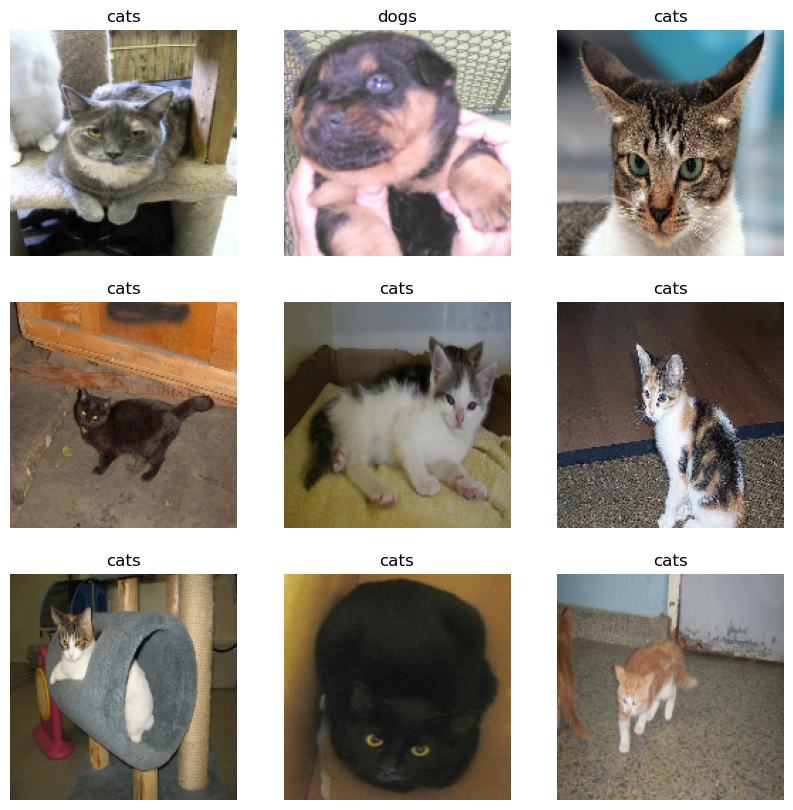

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

# Data Augmentation

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
data_aug = keras.Sequential([layers.experimental.preprocessing
                             .RandomFlip('horizontal', input_shape=(img_size[0], img_size[1], 3)),
                            layers.experimental.preprocessing.RandomRotation(0.1),
                            layers.experimental.preprocessing.RandomZoom(0.1)])

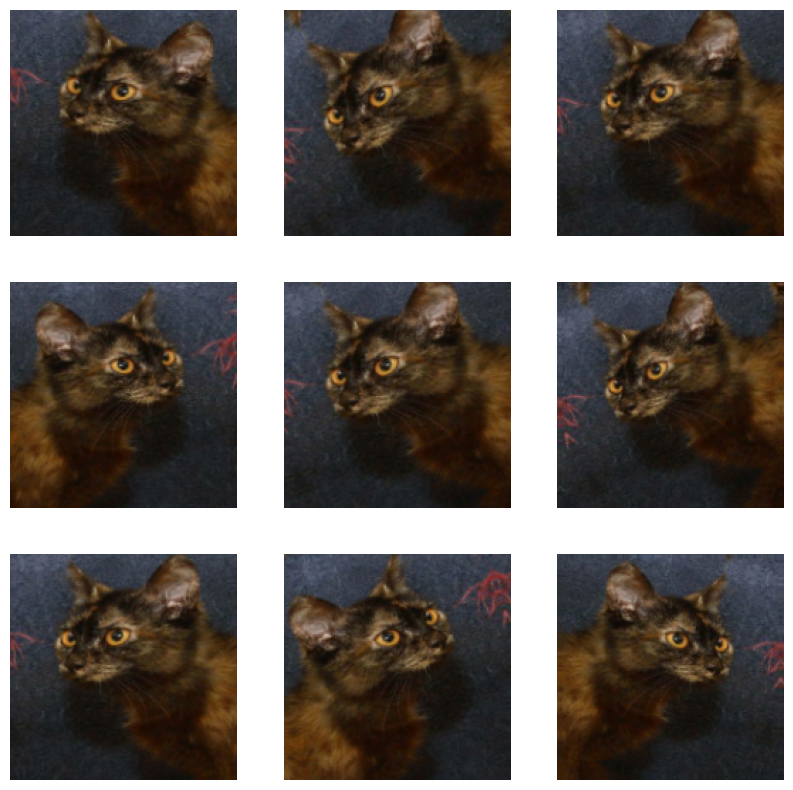

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        aug_images = data_aug(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(aug_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [10]:
autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=autotune)
validation_dataset = validation_dataset.prefetch(buffer_size=autotune)

# A Typical CNN Design

In [11]:
input_shape = (img_size[0], img_size[1], 3)

In [12]:
from tensorflow.keras import layers

In [13]:
model = keras.Sequential([
    data_aug,
    keras.Input(shape=input_shape),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 4, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer='RMSprop',
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                      

In [16]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
63/63 [==============================] - 27s 395ms/step - loss: 0.7728 - accuracy: 0.5110 - val_loss: 0.6892 - val_accuracy: 0.5310
Epoch 2/10
63/63 [==============================] - 24s 383ms/step - loss: 0.6872 - accuracy: 0.5505 - val_loss: 0.6639 - val_accuracy: 0.6320
Epoch 3/10
63/63 [==============================] - 25s 397ms/step - loss: 0.6675 - accuracy: 0.6235 - val_loss: 0.6462 - val_accuracy: 0.6410
Epoch 4/10
63/63 [==============================] - 24s 383ms/step - loss: 0.6255 - accuracy: 0.6560 - val_loss: 0.6060 - val_accuracy: 0.6540
Epoch 5/10
63/63 [==============================] - 24s 376ms/step - loss: 0.5974 - accuracy: 0.6835 - val_loss: 0.6399 - val_accuracy: 0.6320
Epoch 6/10
63/63 [==============================] - 23s 372ms/step - loss: 0.5727 - accuracy: 0.7080 - val_loss: 0.5705 - val_accuracy: 0.6990
Epoch 7/10
63/63 [==============================] - 24s 373ms/step - loss: 0.5614 - accuracy: 0.7230 - val_loss: 0.5470 - val_accuracy: 0.7150

In [17]:
score = model.evaluate(validation_dataset, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 2s 61ms/step - loss: 0.5777 - accuracy: 0.6970
Test loss: 0.5776804685592651
Test accuracy: 0.6970000267028809


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


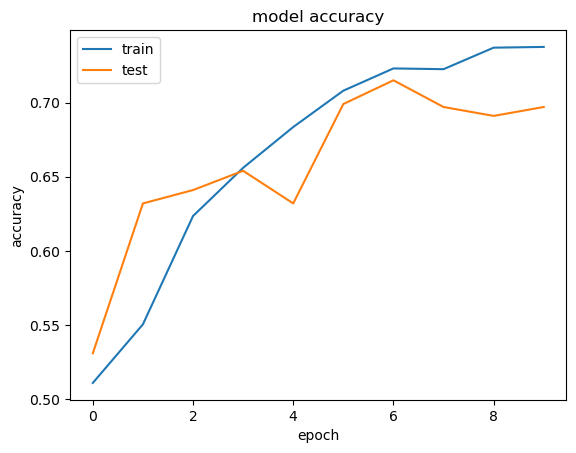

In [18]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

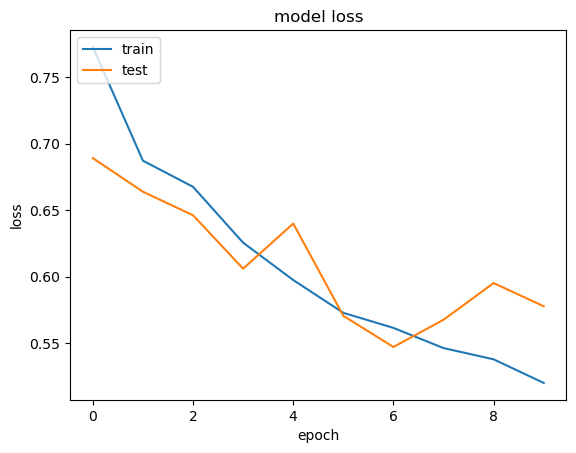

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.save('model_cat_dog.h5')

In [21]:
model_loaded = keras.models.load_model('model_cat_dog.h5')

In [22]:
from keras.utils.vis_utils import plot_model

In [27]:
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
pict_url = 'https://images.unsplash.com/photo-1587402092301-725e37c70fd8?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8Y3V0ZSUyMGRvZ3N8ZW58MHx8MHx8&w=1000&q=80'
picture_path = tf.keras.utils.get_file('300', origin=pict_url)

131344/131344 [==============================] - 0s 1us/step


In [30]:
img = keras.preprocessing.image.load_img(picture_path, target_size=(img_size[0], img_size[1]))
img_array = keras.preprocessing.image.img_to_array(img)

In [31]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

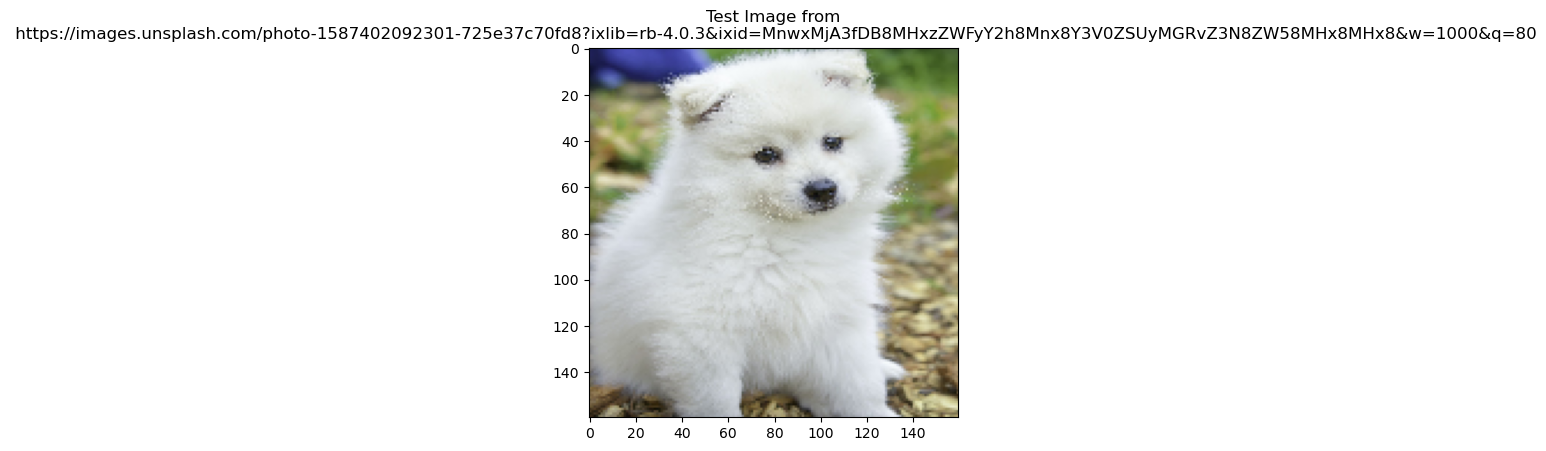

In [32]:
plt.title('Test Image from\n '+ pict_url)
plt.imshow(img)
plt.show()

In [33]:
img_array = tf.expand_dims(img_array, 0)

In [34]:
predictions = model_loaded.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
classes = ['cat', 'dog']

1/1 [==============================] - 0s 77ms/step


In [35]:
print(f"This image belongs to {classes[np.argmax(score)]} with {100 * np.max(score)}")

This image belongs to cat with 64.75979089736938


# Load and display layers of a pre-trained CNN models

In [36]:
from keras.applications.vgg16 import VGG16

In [37]:
vgg16_model = VGG16()

553467096/553467096 [==============================] - 348s 1us/step


In [38]:
print(vgg16_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model

In [40]:
pre_trained_model = VGG16()

In [41]:
from keras.utils.vis_utils import plot_model

In [42]:
plot_model(pre_trained_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Using Pre-trained Layers for Feature Extraction

In [43]:
import pandas as pd

In [44]:
vgg_16 = VGG16(include_top=False, weights='imagenet',
              input_shape=input_shape)

58889256/58889256 [==============================] - 44s 1us/step


In [46]:
output = vgg_16.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = tf.keras.Model(vgg_16.input, output)

In [47]:
vgg_model.trainable = False

In [48]:
for layer in vgg_model.layers:
    layer.trainable = False

In [49]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]

In [50]:
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 
                              'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_4,False
1,<keras.layers.convolutional.conv2d.Conv2D obje...,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D obje...,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling...,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D obje...,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D obje...,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling...,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D obje...,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D obje...,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D obje...,block3_conv3,False


In [51]:
input_shape = (img_height, img_width, 3)

In [53]:
from tensorflow.keras import layers

In [54]:
model2 = keras.Sequential([
    data_aug,
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.Input(shape=input_shape),
    vgg_16,
    layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [55]:
model2.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [56]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 input_6 (InputLayer)        multiple                  0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               6554112   
                                                                 
 dropout_1 (Dropout)         (None, 512)              

In [57]:
history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
63/63 [==============================] - 119s 2s/step - loss: 1.1832 - accuracy: 0.6220 - val_loss: 0.3615 - val_accuracy: 0.8450
Epoch 2/10
63/63 [==============================] - 114s 2s/step - loss: 0.4970 - accuracy: 0.7660 - val_loss: 0.4390 - val_accuracy: 0.8230
Epoch 3/10
63/63 [==============================] - 113s 2s/step - loss: 0.4240 - accuracy: 0.8175 - val_loss: 0.3009 - val_accuracy: 0.8710
Epoch 4/10
63/63 [==============================] - 117s 2s/step - loss: 0.3570 - accuracy: 0.8520 - val_loss: 0.2710 - val_accuracy: 0.8740
Epoch 5/10
63/63 [==============================] - 114s 2s/step - loss: 0.3526 - accuracy: 0.8500 - val_loss: 0.4440 - val_accuracy: 0.8230
Epoch 6/10
63/63 [==============================] - 117s 2s/step - loss: 0.3024 - accuracy: 0.8745 - val_loss: 0.2747 - val_accuracy: 0.8770
Epoch 7/10
63/63 [==============================] - 113s 2s/step - loss: 0.2945 - accuracy: 0.8735 - val_loss: 0.3054 - val_accuracy: 0.8750
Epoch 8/10
63

In [58]:
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\Deepesh Kothari\AppData\Local\Temp\ipykernel_19080\2549523578.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002BE06E949D0>,input_4,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE00D74730>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE00D740D0>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002BE0EFE92B0>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE0EFE9D00>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE7ADD0520>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002BE0A1AA9A0>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE7715CCD0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE73E33CA0>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE06DD2070>,block3_conv3,False


In [59]:
score = model2.evaluate(validation_dataset, verbose=1)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

32/32 [==============================] - 36s 1s/step - loss: 0.2964 - accuracy: 0.8770
Test loss: 0.29643750190734863
Test Accuracy: 0.8769999742507935


# Method 2

In [60]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential

In [61]:
input_shape = (img_height, img_width, 3)

In [63]:
model2 = Sequential()
model2.add(data_aug)
model2.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model2.add(keras.Input(shape=input_shape))
model2.add(vgg_model)
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

In [64]:
model2.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [65]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 input_7 (InputLayer)        multiple                  0         
                                                                 
 model (Functional)          (None, 12800)             14714688  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               6554112   
                                                                 
 dropout_3 (Dropout)         (None, 512)              

In [69]:
history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
63/63 [==============================] - 128s 2s/step - loss: 1.1187 - accuracy: 0.6195 - val_loss: 0.3577 - val_accuracy: 0.8390
Epoch 2/10
63/63 [==============================] - 134s 2s/step - loss: 0.4888 - accuracy: 0.7720 - val_loss: 0.3030 - val_accuracy: 0.8590
Epoch 3/10
63/63 [==============================] - 133s 2s/step - loss: 0.4079 - accuracy: 0.8220 - val_loss: 0.2799 - val_accuracy: 0.8750
Epoch 4/10
63/63 [==============================] - 134s 2s/step - loss: 0.3754 - accuracy: 0.8345 - val_loss: 0.2583 - val_accuracy: 0.8780
Epoch 5/10
63/63 [==============================] - 133s 2s/step - loss: 0.3355 - accuracy: 0.8550 - val_loss: 0.2493 - val_accuracy: 0.8870
Epoch 6/10
63/63 [==============================] - 141s 2s/step - loss: 0.3167 - accuracy: 0.8665 - val_loss: 0.3439 - val_accuracy: 0.8640
Epoch 7/10
63/63 [==============================] - 143s 2s/step - loss: 0.3095 - accuracy: 0.8685 - val_loss: 0.3087 - val_accuracy: 0.8610
Epoch 8/10
63

In [67]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002BE06E949D0>,input_4,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE00D74730>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE00D740D0>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002BE0EFE92B0>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE0EFE9D00>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE7ADD0520>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002BE0A1AA9A0>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE7715CCD0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE73E33CA0>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002BE06DD2070>,block3_conv3,False
